<a href="https://colab.research.google.com/github/YeweiYuan/Iot-Security-Project/blob/master/MLforUDPfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UDP Traffic**


# **Data Preprocessing**

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
dataPath = "/content/drive/My Drive/LINUX"
dataName = "/CAMONLY/CAMONLY_NORMAL_00001_20200725232935udp.csv"
camonly = pd.read_csv(dataPath+dataName)
camonly.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,3.552000e+03,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,1.595726e+09,44.382883,31781.170327,48.067005,32569.380912,32026.037725,46603.349099,24.382883,33341.011824,3.903716
std,5.763820e+03,6.610865,18923.596682,9.947851,18774.443004,2821.981224,8139.624073,6.610865,17830.272863,3.163394
min,1.595716e+09,32.000000,15.000000,40.000000,6.000000,2918.000000,32788.000000,12.000000,234.000000,1.000000
25%,1.595721e+09,36.000000,15430.750000,44.000000,16073.500000,32100.000000,39556.000000,16.000000,19622.000000,1.000000
50%,1.595726e+09,48.000000,31114.500000,47.000000,32553.000000,32100.000000,48475.000000,28.000000,33387.000000,2.000000
75%,1.595731e+09,48.000000,48223.500000,51.000000,48842.750000,32100.000000,53427.000000,28.000000,48697.000000,8.000000
max,1.595736e+09,64.000000,65476.000000,114.000000,65513.000000,60839.000000,60877.000000,44.000000,65512.000000,12.000000


In [ ]:
camonly['time'].std()

5763.819835430446

In [ ]:
import numpy as np
def task(ds, interval=1,time=3):
  means = []
  for row in ds.itertuples():
    if np.isnan(getattr(row, "diftime")) or getattr(row, "diftime") > interval:
      means.append(0)
      continue
    target = ds[(getattr(row, "time")-ds["time"]<=time) & (getattr(row, "time")-ds["time"]>=0)]
    mean = target["diftime"].mean()
    means.append(mean)
  return means

def whitelist(data, lower = 30, upper =60):
  white = []
  for row in data.itertuples():
    if getattr(row, "eth_src") in list(data[(getattr(row, "time") -data["time"] >lower)& (getattr(row, "time")-data["time"] <upper)]["eth_src"]):
      white.append(1)
    else:
      white.append(0)
  return white

In [ ]:
def add_features(df):
  df["diftime"] = df["time"].diff()
  is_white = pd.Series([0]*len(df))
  td0 = pd.Series([0]*len(df))
  for interval in [0.1,0.5,1.5,3]:
    td = pd.Series([0]*len(df))
    tsd = pd.Series([0]*len(df))
    iplmn = pd.Series([0]*len(df))
    iplsd = pd.Series([0]*len(df))
    udplmn = pd.Series([0]*len(df))
    udplsd = pd.Series([0]*len(df))    
    for device in set(df["device"]):
      print("device", device, "begins.bm")
      ds = df[df["device"] == device]
      times = []
      timestds = []
      iplmeans = []
      iplstds = []
      udplmeans = []
      udplstds = []
      for row in ds.itertuples():
        bf = ds[(ds["time"]-getattr(row, "time") >= -interval)&(ds["time"]-getattr(row, "time") <= 0)]
        times.append(bf['time'].count())  
        timestds.append(bf['time'].std())  
        iplmeans.append(bf['ip_len'].mean())
        iplstds.append(bf['ip_len'].std())
        udplmeans.append(bf['udp_len'].mean())
        udplstds.append(bf['udp_len'].std())
      td[ds.index] = times
      tsd[ds.index] = timestds
      iplmn[ds.index] = iplmeans
      iplsd[ds.index] = iplstds
      udplmn[ds.index] = udplmeans
      udplsd[ds.index] = udplstds
    df["pcounts_before_%0.1f" %interval] = td
    df["time_std_before_%0.1f" %interval] = tsd
    df["iplen_mean_before_%0.1f" %interval] = iplmn
    df["iplen_std_before_%0.1f" %interval] = iplsd
    df["udplen_mean_before_%0.1f" %interval] = udplmn
    df["udplen_std_before_%0.1f" %interval] = udplsd
    
    for device in set(df["device"]):
      ds = df[df["device"] == device]
      td0[ds.index] = task(ds)
    df["time_density"] = td0

    #is_white[df.index] = whitelist(df)
    #df["is_new"] = is_white

    df = df.fillna(0)
  return df

In [ ]:
import time

time_start=time.time()
camonly = add_features(camonly)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
time cost 41.18670344352722 s


In [ ]:
camonly[camonly["device"] == 3]

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
425,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6541,DF,40,24255,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,0.376523,1,0.000000,32.0,0.0,12.0,0.0,0.376523,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0
426,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6542,DF,40,24254,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,0.002220,2,0.001570,32.0,0.0,12.0,0.0,0.189371,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0
427,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6580,DF,40,24216,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,1.790034,1,0.000000,32.0,0.0,12.0,0.0,0.000000,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,3,1.034118,32.0,0.0,12.0,0.0
428,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6581,DF,40,24215,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.020222,2,0.014299,32.0,0.0,12.0,0.0,0.547250,2,0.014299,32.0,0.0,12.0,0.0,2,0.014299,32.0,0.0,12.0,0.0,4,1.039988,32.0,0.0,12.0,0.0
429,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6589,DF,40,24207,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.259762,1,0.000000,32.0,0.0,12.0,0.0,0.489752,3,0.156139,32.0,0.0,12.0,0.0,3,0.156139,32.0,0.0,12.0,0.0,5,1.041727,32.0,0.0,12.0,0.0
430,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6590,DF,40,24206,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.039747,2,0.028106,32.0,0.0,12.0,0.0,0.414751,4,0.168273,32.0,0.0,12.0,0.0,4,0.168273,32.0,0.0,12.0,0.0,6,1.013394,32.0,0.0,12.0,0.0


In [ ]:
dataName0 = "/CAMPC/CAMPC_CONNECT_30MINudp.csv"
dataName1 = "/CAMPC/CAMPC_NORMAL_00002_20200724013000udp.csv"
dataName2 = "/CAMPC/CAMPC_NORMAL_00003_20200724020000udp.csv"
campc0 = pd.read_csv(dataPath+dataName0)
campc1 = pd.read_csv(dataPath+dataName1)
campc2 = pd.read_csv(dataPath+dataName2)

In [ ]:
time_start = time.time()
campc0 = add_features(campc0)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
time cost 751.5878350734711 s


In [ ]:
campc1 = add_features(campc1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
campc2 = add_features(campc2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
campc = pd.concat([campc0, campc1, campc2])
campc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,1.794210e+05,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000
mean,1.595551e+09,38.894265,6463.965606,38.033870,29647.066999,41308.223775,54090.913037,18.894265,35186.336661,2.275893,0.030156,4.214830,0.036439,38.953382,3.658900,18.953382,3.658900,0.030556,17.747755,0.151618,38.893790,5.063020,18.893790,5.063020,52.065756,0.439547,38.897496,5.709302,18.897496,5.709302,103.495215,0.869824,38.913416,6.009833,18.913416,6.009833
std,2.367251e+03,6.892890,15518.217946,3.680886,8650.998390,3837.674197,2285.635675,6.892890,20365.553003,1.140014,0.084620,1.381399,0.009444,3.306419,5.385559,3.306419,5.385559,0.058725,3.682285,0.014110,1.873177,4.485604,1.873177,4.485604,9.632627,0.032308,1.335510,3.591173,1.335510,3.591173,18.716589,0.060509,1.207149,3.484471,1.207149,3.484471
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,12255.000000,33453.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28858.000000,43504.000000,54205.000000,18.000000,16110.000000,2.000000,0.011499,3.000000,0.032023,37.333333,1.154701,17.333333,1.154701,0.025843,16.000000,0.145450,37.894737,2.676174,17.894737,2.676174,48.000000,0.430291,38.290909,3.110515,18.290909,3.110515,97.000000,0.860290,38.396226,3.278081,18.396226,3.278081
50%,1.595552e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,39571.000000,2.000000,0.028528,4.000000,0.036997,38.400000,3.000000,18.400000,3.000000,0.027558,18.000000,0.152228,38.421053,3.128974,18.421053,3.128974,55.000000,0.441039,38.745763,3.765875,18.745763,3.765875,109.000000,0.873625,38.916667,6.643858,18.916667,6.643858
75%,1.595553e+09,40.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,20.000000,53719.000000,2.000000,0.039302,5.000000,0.041179,39.333333,3.785939,19.333333,3.785939,0.030510,20.000000,0.158929,39.714286,4.407785,19.714286,4.407785,59.000000,0.451958,39.428571,8.331252,19.428571,8.331252,117.000000,0.886995,39.338983,7.331051,19.338983,7.331051
max,1.595554e+09,748.000000,65532.000000,51.000000,65533.000000,60844.000000,58830.000000,728.000000,65535.000000,9.000000,31.735408,25.000000,0.070706,390.000000,506.288455,370.000000,506.288455,15.869329,35.000000,0.243071,220.571429,319.544676,200.571429,319.544676,72.000000,0.552299,125.111111,193.962061,105.111111,193.962061,134.000000,2.027366,101.600000,179.088486,81.600000,179.088486


In [ ]:
#camonly.to_csv("/content/drive/My Drive/LINUX/udpcapco.csv",index=False,sep=',')
#campc.to_csv("/content/drive/My Drive/LINUX/udpcappc.csv",index=False,sep=',')

In [ ]:
dataName3 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00001_20200725194622udp.csv"
dataName4 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00002_20200725200000udp.csv"
dataName5 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00003_20200725203000udp.csv"
dataName6 = "/COMHIPRO/CAMHIPRO_VIDEO_00001_20200725210311udp.csv"
dataName7 = "/COMHIPRO/CAMHIPRO_VIDEO_00002_20200725213000udp.csv"
camhip1 = pd.read_csv(dataPath+dataName3)
camhip2 = pd.read_csv(dataPath+dataName4)
camhip3 = pd.read_csv(dataPath+dataName5)
camhip4 = pd.read_csv(dataPath+dataName6)
camhip5 = pd.read_csv(dataPath+dataName7)

In [ ]:
camhip1 = add_features(camhip1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camhip2 = add_features(camhip2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camhip3 = add_features(camhip3)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camhip4 = add_features(camhip4)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camhip5 = add_features(camhip5)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camhipc = pd.concat([camhip1, camhip2])
camhipv = pd.concat([camhip3, camhip4, camhip5])
camhipc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,1.213000e+04,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000
mean,1.595704e+09,32.414674,32727.786562,62.604452,32255.655235,40578.400989,49740.825721,12.414674,56814.962902,1.648887,0.213867,1.241550,0.006511,32.510893,0.278907,12.510893,0.278907,0.216930,2.676092,0.197074,32.459844,0.433745,12.459844,0.433745,7.315581,0.486638,32.496062,0.583745,12.496062,0.583745,13.621847,0.887997,32.518606,0.677112,12.518606,0.677112
std,7.520926e+02,9.475164,18603.464390,2.583588,18877.986337,1336.297150,1336.747896,9.475164,5067.504441,0.947183,0.126997,0.463905,0.016432,8.327543,7.908037,8.327543,7.908037,0.029912,0.721755,0.049131,3.846613,8.393757,3.846613,8.393757,1.433034,0.078450,3.922520,9.539886,3.922520,9.539886,2.232958,0.140752,4.046050,10.201415,4.046050,10.201415
min,1.595703e+09,32.000000,1.000000,41.000000,8.000000,32100.000000,34789.000000,12.000000,1005.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595703e+09,32.000000,17040.250000,63.000000,15665.000000,40789.000000,49694.000000,12.000000,57488.000000,1.000000,0.102011,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.217582,2.000000,0.171698,32.000000,0.000000,12.000000,0.000000,7.000000,0.476331,32.000000,0.000000,12.000000,0.000000,14.000000,0.902532,32.000000,0.000000,12.000000,0.000000
50%,1.595704e+09,32.000000,31848.000000,63.000000,31846.000000,40789.000000,49694.000000,12.000000,57489.000000,1.000000,0.233048,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.220155,3.000000,0.198130,32.000000,0.000000,12.000000,0.000000,7.000000,0.488480,32.000000,0.000000,12.000000,0.000000,14.000000,0.914821,32.000000,0.000000,12.000000,0.000000
75%,1.595705e+09,32.000000,48564.750000,63.000000,48540.750000,40789.000000,49694.000000,12.000000,57489.000000,3.000000,0.333749,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.221694,3.000000,0.236769,32.000000,0.000000,12.000000,0.000000,8.000000,0.524622,32.000000,0.000000,12.000000,0.000000,14.000000,0.925506,32.000000,0.000000,12.000000,0.000000
max,1.595705e+09,748.000000,65532.000000,63.000000,65532.000000,40789.000000,60139.000000,728.000000,64666.000000,4.000000,1.699150,9.000000,0.070680,748.000000,506.288455,728.000000,506.288455,0.697742,18.000000,0.351891,138.571429,258.332438,118.571429,258.332438,37.000000,0.876192,129.375000,241.666126,109.375000,241.666126,46.000000,1.071021,129.375000,241.666126,109.375000,241.666126


In [ ]:
camhipc.to_csv("/content/drive/My Drive/LINUX/udpcaphipc.csv",index=False,sep=',')
camhipv.to_csv("/content/drive/My Drive/LINUX/udpcaphipv.csv",index=False,sep=',')

In [ ]:
dataName8 = "/TINYCAM/TinyCamP2P_00001_20200728153719udp.csv"
dataName9 = "/TINYCAM/TinyCamP2P_00002_20200728160000udp.csv"
dataName10 = "/TINYCAM/TinyCamP2P_00003_20200728163000udp.csv"
camtiny1 = pd.read_csv(dataPath+dataName8)
camtiny2 = pd.read_csv(dataPath+dataName9)
camtiny3 = pd.read_csv(dataPath+dataName10)

In [ ]:
camtiny1 = add_features(camtiny1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camtiny2 = add_features(camtiny2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camtiny3 = add_features(camtiny3)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
camtiny = pd.concat([camtiny1,camtiny2, camtiny3])
camtiny.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,8.573000e+04,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000
mean,1.595950e+09,36.728170,34498.578199,62.916202,33193.113636,46969.065683,54931.682270,16.728170,37880.839379,2.995183,0.057746,2.461274,0.043082,36.878472,2.551074,16.878472,2.551074,0.058035,9.076496,0.158575,36.747438,3.363591,16.747438,3.363591,26.301855,0.446371,36.741982,3.457773,16.741982,3.457773,51.957296,0.876571,36.741733,3.542553,16.741733,3.542553
std,1.429038e+03,4.336943,18746.970750,1.187985,19701.048598,1076.486877,658.298091,4.336943,16974.206311,0.105877,0.032621,0.778581,0.017604,2.281510,2.552250,2.281510,2.552250,0.004112,1.604412,0.017001,1.264037,2.161325,1.264037,2.161325,3.404545,0.037003,1.018318,2.339112,1.018318,2.339112,5.450033,0.070459,0.952080,2.639232,0.952080,2.639232
min,1.595947e+09,32.000000,0.000000,41.000000,1.000000,32100.000000,36370.000000,12.000000,1.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.595948e+09,32.000000,18411.250000,63.000000,15363.000000,47047.000000,54966.000000,12.000000,24971.250000,3.000000,0.031011,2.000000,0.035089,35.000000,0.000000,15.000000,0.000000,0.057510,8.000000,0.151812,36.000000,2.777460,16.000000,2.777460,25.000000,0.439330,36.320000,2.749545,16.320000,2.749545,51.000000,0.870680,36.627451,3.115176,16.627451,3.115176
50%,1.595950e+09,38.000000,36105.000000,63.000000,33598.000000,47047.000000,54966.000000,18.000000,45958.000000,3.000000,0.061610,2.000000,0.044150,36.000000,3.464102,16.000000,3.464102,0.058490,9.000000,0.160312,36.500000,2.898275,16.500000,2.898275,26.000000,0.450451,36.500000,2.824072,16.500000,2.824072,52.000000,0.882822,36.703704,3.518147,16.703704,3.518147
75%,1.595951e+09,38.000000,50583.000000,63.000000,50923.750000,47047.000000,54966.000000,18.000000,47550.750000,3.000000,0.083347,3.000000,0.057906,38.000000,3.464102,18.000000,3.464102,0.059366,10.000000,0.167857,36.666667,3.000000,16.666667,3.000000,27.000000,0.458177,37.111111,4.123451,17.111111,4.123451,53.000000,0.892126,36.769231,3.719872,16.769231,3.719872
max,1.595952e+09,748.000000,65535.000000,63.000000,65534.000000,47047.000000,58378.000000,728.000000,65535.000000,4.000000,0.720120,16.000000,0.070670,80.500000,178.179685,60.500000,178.179685,0.104732,31.000000,0.344993,110.166667,201.486220,90.166667,201.486220,68.000000,0.627477,71.185185,141.553665,51.185185,141.553665,111.000000,1.147050,70.240000,141.553665,50.240000,141.553665


In [ ]:
camtiny.to_csv("/content/drive/My Drive/LINUX/udpcaptiny.csv",index=False,sep=',')

In [ ]:
dataName11 = "/UDPFLOOD/udpflood_00001_20200901174914udp.csv"
dataName12 = "/UDPFLOOD/udpflood_00003_20200901175100udp.csv"
dataName13 = "/UDPFLOOD/udpflood_00004_20200901175200udp.csv"

udpflood1 = pd.read_csv(dataPath+dataName11)
udpflood2 = pd.read_csv(dataPath+dataName12)
udpflood3 = pd.read_csv(dataPath+dataName13)

In [ ]:
udpflood = pd.concat([udpflood1,udpflood2,udpflood3])

In [ ]:
udpflood.describe()

,time,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,ip_frag,ip_ttl,ip_proto,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,diftime,device
count,9.940000e+02,994.0,994.0,994.0,994.0,994.0,994.000000,0.0,994.0,994.0,994.0,994.000000,994.0,994.0,994.0,994.0,993.000000,994.0
mean,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,16294.116700,NaN,0.0,128.0,17.0,41117.515091,80.0,56777.0,1008.0,33087.0,0.220293,1.0
std,6.875972e+01,0.0,0.0,0.0,0.0,0.0,9291.704959,NaN,0.0,0.0,0.0,22385.117317,0.0,0.0,0.0,0.0,2.505224,0.0
min,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,71.000000,NaN,0.0,128.0,17.0,6.000000,80.0,56777.0,1008.0,33087.0,0.000005,1.0
25%,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,8499.000000,NaN,0.0,128.0,17.0,8429.750000,80.0,56777.0,1008.0,33087.0,0.000006,1.0
50%,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,16811.000000,NaN,0.0,128.0,17.0,49520.500000,80.0,56777.0,1008.0,33087.0,0.000007,1.0
75%,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,24485.500000,NaN,0.0,128.0,17.0,57186.750000,80.0,56777.0,1008.0,33087.0,0.000008,1.0
max,1.598979e+09,2048.0,4.0,5.0,0.0,1028.0,31957.000000,NaN,0.0,128.0,17.0,65533.000000,80.0,56777.0,1008.0,33087.0,71.726828,1.0


In [ ]:
udpflood['device'] = 1

In [ ]:
udpflood = add_features(udpflood)

device 1 begins.bm
device 1 begins.bm
device 1 begins.bm
device 1 begins.bm


In [ ]:
udpflood.to_csv("/content/drive/My Drive/LINUX/udpflood.csv",index=False,sep=',')

In [ ]:
dataName14 = "/UDPFLOOD/udpflood1_30ms_30_00001_20200904022938udp.csv"
dataName15 = "/UDPFLOOD/udpflood_50ms_50_00001_20200904020937udp.csv"
dataName16 = "/UDPFLOOD/udpflood_auto_0udp.csv"
dataName17 = "/UDPFLOOD/udpflood_auto_30udp.csv"

udpflood1 = pd.read_csv(dataPath+dataName14)
udpflood2 = pd.read_csv(dataPath+dataName15)
udpflood3 = pd.read_csv(dataPath+dataName16)
udpflood4 = pd.read_csv(dataPath+dataName17)

In [ ]:
udpflood1['ip_src']=1
udpflood2['ip_src']=2
udpflood3['ip_src']=3
udpflood4['ip_src']=4
udpflood1['device'] = 1
udpflood2['device'] = 2
udpflood3['device'] = 3
udpflood4['device'] = 4
udpflood1.head()

,time,eth_dst,eth_src,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,ip_frag,ip_ttl,ip_proto,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device
0,1.599183e+09,15:62:f9:d2:da:a0,cd:b2:eb:88:e9:9a,2048,4,5,0,58,1517,NaN,0,128,17,8076,1,10.42.0.22,80,56777,38,15148,b'&Q\xb5\x9d\xd9;\xa6\x15\x84\x8a\xfb\x81\xa0\...,1
1,1.599183e+09,f5:1d:50:82:0f:63,38:a4:09:f5:a7:56,2048,4,5,0,58,25178,NaN,0,128,17,49950,1,10.42.0.22,80,56777,38,15148,b'&Q\xb5\x9d\xd9;\xa6\x15\x84\x8a\xfb\x81\xa0\...,1
2,1.599183e+09,03:a3:87:87:e7:a4,3b:91:b9:f4:be:c4,2048,4,5,0,58,23951,NaN,0,128,17,51177,1,10.42.0.22,80,56777,38,15148,b'&Q\xb5\x9d\xd9;\xa6\x15\x84\x8a\xfb\x81\xa0\...,1
3,1.599183e+09,8f:71:02:8c:f8:bf,35:ea:9f:96:87:ab,2048,4,5,0,58,6037,NaN,0,128,17,3556,1,10.42.0.22,80,56777,38,15148,b'&Q\xb5\x9d\xd9;\xa6\x15\x84\x8a\xfb\x81\xa0\...,1
4,1.599183e+09,06:7f:7a:3b:e1:ee,e7:49:d8:7b:84:13,2048,4,5,0,58,1264,NaN,0,128,17,8329,1,10.42.0.22,80,56777,38,15148,b'&Q\xb5\x9d\xd9;\xa6\x15\x84\x8a\xfb\x81\xa0\...,1


In [ ]:
udpflood0 = pd.concat([udpflood1,udpflood2,udpflood3,udpflood4])

In [ ]:
udpflood3.head()

,time,eth_dst,eth_src,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,ip_frag,ip_ttl,ip_proto,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device


In [ ]:
udpflood0 = add_features(udpflood0)

device 1 begins.bm
device 2 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 4 begins.bm


In [ ]:
udpflood0.to_csv("/content/drive/My Drive/LINUX/udpflood0.csv",index=False,sep=',')

In [ ]:
udpflood0.describe()

,time,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,ip_frag,ip_ttl,ip_proto,ip_chksum,ip_src,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,1.041000e+04,10410.0,10410.0,10410.0,10410.0,10410.000000,10410.000000,10410.0,10410.0,10410.0,10410.0,10410.000000,10410.000000,10410.0,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.00000,10410.000000,10410.0,10410.0,10410.0,10410.0,10410.000000,10410.000000,10410.000000,10410.0,10410.0,10410.0,10410.0,10410.000000,10410.000000,10410.0,10410.0,10410.0,10410.0,10410.000000,10410.000000,10410.0,10410.0,10410.0,10410.0
mean,1.599183e+09,2048.0,4.0,5.0,0.0,63.231508,15988.159270,0.0,0.0,128.0,17.0,39499.290778,2.369356,80.0,49761.423055,43.231508,23200.485591,2.369356,-0.056407,1173.35024,0.002969,58.0,0.0,38.0,0.0,0.162956,1191.096061,0.040187,58.0,0.0,38.0,0.0,1191.096061,0.040187,58.0,0.0,38.0,0.0,1191.096061,0.040187,58.0,0.0,38.0,0.0
std,5.104567e+02,0.0,0.0,0.0,0.0,8.790273,9230.825932,0.0,0.0,0.0,0.0,23356.700115,1.307649,0.0,9169.443998,8.790273,6532.713138,1.307649,16.090302,972.70497,0.002786,0.0,0.0,0.0,0.0,1.014544,977.775271,0.030370,0.0,0.0,0.0,0.0,977.775271,0.030370,0.0,0.0,0.0,0.0,977.775271,0.030370,0.0,0.0,0.0,0.0
min,1.599182e+09,2048.0,4.0,5.0,0.0,58.000000,0.000000,0.0,0.0,128.0,17.0,1.000000,1.000000,80.0,37778.000000,38.000000,15148.000000,1.000000,-1638.511031,1.00000,0.000000,58.0,0.0,38.0,0.0,0.000000,1.000000,0.000000,58.0,0.0,38.0,0.0,1.000000,0.000000,58.0,0.0,38.0,0.0,1.000000,0.000000,58.0,0.0,38.0,0.0
25%,1.599182e+09,2048.0,4.0,5.0,0.0,58.000000,7912.250000,0.0,0.0,128.0,17.0,7985.250000,1.000000,80.0,37778.000000,38.000000,15148.000000,1.000000,0.000001,197.00000,0.000367,58.0,0.0,38.0,0.0,0.002395,219.000000,0.029645,58.0,0.0,38.0,0.0,219.000000,0.029645,58.0,0.0,38.0,0.0,219.000000,0.029645,58.0,0.0,38.0,0.0
50%,1.599182e+09,2048.0,4.0,5.0,0.0,58.000000,16100.500000,0.0,0.0,128.0,17.0,49591.500000,2.000000,80.0,56777.000000,38.000000,25609.000000,2.000000,0.000009,1064.50000,0.002474,58.0,0.0,38.0,0.0,0.004264,1086.500000,0.036394,58.0,0.0,38.0,0.0,1086.500000,0.036394,58.0,0.0,38.0,0.0,1086.500000,0.036394,58.0,0.0,38.0,0.0
75%,1.599183e+09,2048.0,4.0,5.0,0.0,78.000000,24024.250000,0.0,0.0,128.0,17.0,57472.750000,4.000000,80.0,56777.000000,58.000000,31165.000000,4.000000,0.030102,1932.00000,0.004935,58.0,0.0,38.0,0.0,0.019645,1954.000000,0.049913,58.0,0.0,38.0,0.0,1954.000000,0.049913,58.0,0.0,38.0,0.0,1954.000000,0.049913,58.0,0.0,38.0,0.0
max,1.599183e+09,2048.0,4.0,5.0,0.0,78.000000,31998.000000,0.0,0.0,128.0,17.0,65533.000000,4.000000,80.0,56777.000000,58.000000,31165.000000,4.000000,73.275775,3173.00000,0.027165,58.0,0.0,38.0,0.0,36.637892,3195.000000,0.161071,58.0,0.0,38.0,0.0,3195.000000,0.161071,58.0,0.0,38.0,0.0,3195.000000,0.161071,58.0,0.0,38.0,0.0


In [ ]:
dataName18 = "/test/Hippre_00001_20200903215018udp.csv"
dataName19 = "/test/Hippre_00002_20200903220307udp.csv"
dataName20 = "/test/PCpre_00001_20200903235539udp.csv"
dataName21 = "/test/PCpre_00002_20200904000039udp.csv"
#dataName22 = "/test/Tinypre_00001_20200903223407udp.csv"
#dataName23 = "/test/Tinypre_00002_20200903224034udp.csv"

test1 = pd.read_csv(dataPath+dataName18)
test2 = pd.read_csv(dataPath+dataName19)
test3 = pd.read_csv(dataPath+dataName20)
test4 = pd.read_csv(dataPath+dataName21)
#test5 = pd.read_csv(dataPath+dataName22)
#test6 = pd.read_csv(dataPath+dataName23)

In [ ]:
test = pd.concat([test1,test2,test3,test4])

In [ ]:
test.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,3.889600e+04,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000
mean,1.599169e+09,37.058361,29234.551908,60.087670,29286.161328,36498.399013,53248.648499,17.058361,39899.187191,2.677653
std,3.313812e+03,5.172245,18601.705348,5.647199,20267.868098,2460.223993,2250.832654,5.172245,8869.681412,0.475453
min,1.599166e+09,32.000000,3.000000,45.000000,0.000000,32100.000000,36237.000000,12.000000,89.000000,1.000000
25%,1.599167e+09,32.000000,13653.250000,52.000000,11433.750000,32967.000000,51858.000000,12.000000,34307.750000,2.000000
50%,1.599167e+09,38.000000,25878.000000,64.000000,25083.000000,38204.000000,51858.000000,18.000000,39178.000000,3.000000
75%,1.599174e+09,38.000000,44727.250000,64.000000,47311.250000,38204.000000,56338.000000,18.000000,45512.000000,3.000000
max,1.599174e+09,88.000000,65535.000000,64.000000,65534.000000,38204.000000,56989.000000,68.000000,65526.000000,4.000000


In [ ]:
test=add_features(test)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [ ]:
test.to_csv("/content/drive/My Drive/LINUX/test.csv",index=False,sep=',')

In [ ]:
import pandas as pd
camonly = pd.read_csv('/content/drive/My Drive/LINUX/udpcapco.csv')
camhip = pd.read_csv('/content/drive/My Drive/LINUX/udpcaphipv.csv')
camtiny = pd.read_csv('/content/drive/My Drive/LINUX/udpcaptiny.csv')
campc = pd.read_csv('/content/drive/My Drive/LINUX/udpcappc.csv')
udpflood = pd.read_csv('/content/drive/My Drive/LINUX/udpflood.csv')
udpflood0 = pd.read_csv('/content/drive/My Drive/LINUX/udpflood0.csv')
test = pd.read_csv('/content/drive/My Drive/LINUX/test.csv')

In [ ]:
udpflood = pd.read_csv('/content/drive/My Drive/LINUX/udpflood.csv')
test = pd.read_csv('/content/drive/My Drive/LINUX/test.csv')

In [ ]:
udpflood0['ip_src']=1

In [ ]:
cap = pd.concat([campc,camonly,camhip,udpflood0])

In [ ]:
cap.groupby('ip_src').count()

,Unnamed: 0,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,iplenpv,udplenpv,chksumpv,eth_type,ip_version,ip_ihl,ip_tos,ip_frag,ip_proto
ip_src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410
101.27.31.167,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,0,0,0
106.165.63.227,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0
110.86.119.15,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0
112.247.4.160,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,0,0,0,0,0,0
113.24.59.167,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,0,0,0,0,0,0
116.249.117.82,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,0,0,0,0,0,0
118.181.46.144,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0
121.11.118.143,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0,0,0,0,0,0


In [ ]:
test.groupby('ip_src').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,iplenpv,udplenpv,chksumpv,source
ip_src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.42.0.178,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264,26264
47.254.36.28,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
47.52.252.114,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
47.75.197.199,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416
47.93.129.21,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68


In [ ]:
test['source']=test['ip_src']
test.loc[test['ip_src'] =='10.42.0.178','source']=int(3)
test.loc[test['ip_src'] =='47.254.36.28','source']=int(4)
test.loc[test['ip_src'] =='47.52.252.114','source']=int(5)
test.loc[test['ip_src'] =='47.75.197.199','source']= int(8)
test.loc[test['ip_src'] =='47.93.129.21','source']= int(6)

In [ ]:
udpflood['source'] = int(100)

In [ ]:
capip = cap.groupby('ip_src').count()
nsources = capip[capip['time']>30].index.tolist()
nsources

[1,
 '113.24.59.167',
 '192.168.1.7',
 '47.254.36.28',
 '47.52.252.114',
 '47.93.129.21',
 '58.101.161.102',
 '95.223.117.243']

In [ ]:
#cap["device"] = [0]*len(cap)
#sources = list(set(cap["ip_src"]))
#sources

In [ ]:
cap["source"] = [0]*len(cap)
dp = 1
for nsource in nsources:
  cap['source'] += cap["ip_src"].apply(lambda x: dp if x == nsource else 0)
  dp += 1
cap.describe()

,Unnamed: 0,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,iplenpv,udplenpv,chksumpv,eth_type,ip_version,ip_ihl,ip_tos,ip_frag,ip_proto,source
count,258319.00000,2.687290e+05,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,10410.0,10410.0,10410.0,10410.0,10410.0,10410.0,268729.000000
mean,73322.66179,1.595738e+09,39.932616,14476.459117,48.621053,30978.898872,39426.530642,52585.579692,19.932616,36397.747898,1.947252,0.110933,49.108816,0.033516,39.880965,3.814149,19.880965,3.814149,0.070504,60.755966,0.148362,39.730399,5.154864,19.730399,5.154864,88.605480,0.421991,39.734864,5.836482,19.734864,5.836482,130.382114,0.829540,39.758236,6.108094,19.758236,6.108094,0.321644,0.321644,0.108278,2048.0,4.0,5.0,0.0,0.0,17.0,5.010375
std,51273.05771,6.951252e+05,8.764496,20211.687214,19.669773,13441.707791,8580.007951,3527.613590,8.764496,19941.884164,1.203899,3.592376,295.949690,0.015469,5.529784,5.711279,5.529784,5.711279,0.687332,297.572599,0.034263,4.463700,4.653633,4.463700,4.653633,293.670267,0.098082,4.193690,3.776846,4.193690,3.776846,288.551795,0.195405,4.138941,3.595577,4.138941,3.595577,0.188606,0.188606,0.072239,0.0,0.0,0.0,0.0,0.0,0.0,2.289267
min,0.00000,1.595546e+09,32.000000,0.000000,36.000000,0.000000,80.000000,32788.000000,12.000000,0.000000,1.000000,-1638.511031,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2048.0,4.0,5.0,0.0,0.0,17.0,0.000000
25%,30513.50000,1.595551e+09,38.000000,0.000000,36.000000,28852.000000,40789.000000,49694.000000,18.000000,18326.000000,1.000000,0.011005,3.000000,0.028440,37.200000,1.000000,17.200000,1.000000,0.026390,11.000000,0.144160,37.777778,2.680174,17.777778,2.680174,33.000000,0.427088,38.327869,3.119251,18.327869,3.119251,64.000000,0.854472,38.472727,3.299772,18.472727,3.299772,0.121424,0.121424,0.071429,2048.0,4.0,5.0,0.0,0.0,17.0,3.000000
50%,62803.00000,1.595553e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,40273.000000,2.000000,0.030110,4.000000,0.036212,38.500000,3.000000,18.500000,3.000000,0.028979,17.000000,0.153073,38.500000,3.481041,18.500000,3.481041,51.000000,0.441573,39.122807,5.839047,19.122807,5.839047,104.000000,0.873248,39.179487,6.935705,19.179487,6.935705,0.324114,0.324114,0.107143,2048.0,4.0,5.0,0.0,0.0,17.0,7.000000
75%,114840.50000,1.595708e+09,40.000000,27710.000000,63.000000,31936.000000,43504.000000,54205.000000,20.000000,56339.000000,2.000000,0.051978,5.000000,0.042065,40.000000,4.320494,20.000000,4.320494,0.047083,20.000000,0.162029,40.700000,6.060803,20.700000,6.060803,57.000000,0.456201,39.925926,9.191471,19.925926,9.191471,114.000000,0.891659,39.661017,8.066143,19.661017,8.066143,0.505900,0.505900,0.142857,2048.0,4.0,5.0,0.0,0.0,17.0,7.000000
max,179420.00000,1.599183e+09,748.000000,65535.

In [ ]:
camtiny['source']=5

In [ ]:
cap.loc[cap['source'] == 2,'source']= int(3)

In [ ]:
cap.groupby('source').count()

,Unnamed: 0,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,iplenpv,udplenpv,chksumpv,eth_type,ip_version,ip_ihl,ip_tos,ip_frag,ip_proto
source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,0,0,0,0,0,0
1,0,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410,10410
2,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,0,0,0,0,0,0
3,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,74841,0,0,0,0,0,0
4,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,0,0,0,0,0,0
5,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,0,0,0,0,0,0
6,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,0,0,0,0,0,0
7,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,0,0,0,0,0,0
8,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,0,0,0,0,0,0


In [ ]:
#cap =  pd.concat([cap,camtiny])

In [ ]:
#data0 = cap[['source', 'ip_len', 'udp_len' ,'time_density','time_density_before_0.1','time_density_before_0.5','time_density_before_1.5','time_density_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
data0 = cap[['source', 'ip_len', 'udp_len' ,'time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
datapro = cap[['source', 'iplenpv', 'udplenpv' ,'chksumpv','time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
#datapro = cap[['source', 'ip_len', 'udp_len', 'iplenpv', 'udplenpv' ,'chksumpv','time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
datatest = test[['source', 'iplenpv', 'udplenpv' ,'chksumpv','time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
floodtest = udpflood[['source', 'iplenpv', 'udplenpv' ,'chksumpv','time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
data0.head()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
0,4,48,28,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
1,6,48,28,0.035480,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
2,5,48,28,0.109544,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
3,4,48,28,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
4,4,36,16,15.869329,2,2,2,2,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281


In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
#data = data.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('ip_chksum'))
data = data0.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('udp_chksum').astype(int))
data.head()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,4,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,4,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,3,32,12,0.00000,1,1,1,1,0.0,32.0,0.0,12.0,0.0,0.0,32.0,0.0,12.0,0.0,0.0,32.0,0.0,12.0,0.0,0.0,32.0,0.0,12.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,1,58,38,0.00000,1,1,1,1,0.0,58.0,0.0,38.0,0.0,0.0,58.0,0.0,38.0,0.0,0.0,58.0,0.0,38.0,0.0,0.0,58.0,0.0,38.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
1,6,48,28,0.03548,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.describe()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
count,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000,268729.000000
mean,5.010375,39.932616,19.932616,0.070504,49.108816,60.755966,88.605480,130.382114,0.033516,39.880965,3.814149,19.880965,3.814149,0.148362,39.730399,5.154864,19.730399,5.154864,0.421991,39.734864,5.836482,19.734864,5.836482,0.829540,39.758236,6.108094,19.758236,6.108094,0.565544,0.468896,0.519728,0.492314,0.514496,0.496601,0.525008,0.491659,0.437456,0.483074,0.508583,0.558652,0.540329,0.453308,0.527271,0.520011
std,2.289267,8.764496,8.764496,0.687332,295.949690,297.572599,293.670267,288.551795,0.015469,5.529784,5.711279,5.529784,5.711279,0.034263,4.463700,4.653633,4.463700,4.653633,0.098082,4.193690,3.776846,4.193690,3.776846,0.195405,4.138941,3.595577,4.138941,3.595577,0.495686,0.499033,0.499612,0.499942,0.499791,0.499989,0.499375,0.499931,0.496074,0.499714,0.499927,0.496549,0.498372,0.497816,0.499257,0.499600
min,0.000000,32.000000,12.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,38.000000,18.000000,0.026390,3.000000,11.000000,33.000000,64.000000,0.028440,37.200000,1.000000,17.200000,1.000000,0.144160,37.777778,2.680174,17.777778,2.680174,0.427088,38.327869,3.119251,18.327869,3.119251,0.854472,38.472727,3.299772,18.472727,3.299772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,38.000000,18.000000,0.028979,4.000000,17.000000,51.000000,104.000000,0.036212,38.500000,3.000000,18.500000,3.000000,0.153073,38.500000,3.481041,18.500000,3.481041,0.441573,39.122807,5.839047,19.122807,5.839047,0.873248,39.179487,6.935705,19.179487,6.935705,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,7.000000,40.000000,20.000000,0.047083,5.000000,20.000000,57.000000,114.000000,0.042065,40.000000,4.320494,20.000000,4.320494,0.162029,40.700000,6.060803,20.700000,6.060803,0.456201,39.925926,9.191471,19.925926,9.191471,0.891659,39.661017,8.066143,19.661017,8.066143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8.000000,748.000000,728.000000,36.637892,3173.000000,3195.000000,3195.000000,3195.000000,0.070706,390.000000,506.288455,370.000000,506.288455,0.340120,220.57

In [ ]:
datapro.shape

(268729, 29)

In [ ]:
data.shape

(268729, 44)

In [ ]:
data.to_csv("/content/drive/My Drive/LINUX/Data/data1.csv",index=False,sep=',')

In [ ]:
datapro.to_csv("/content/drive/My Drive/LINUX/Data/data1pro.csv",index=False,sep=',')

In [ ]:
datatest.to_csv("/content/drive/My Drive/LINUX/Data/datatest.csv",index=False,sep=',')

In [ ]:
floodtest.to_csv("/content/drive/My Drive/LINUX/Data/floodtest.csv",index=False,sep=',')

# **Machine Learning**

---

> 


In [ ]:
from sklearn.model_selection import train_test_split
import time

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
datapro.head()

,source,iplenpv,udplenpv,chksumpv,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
0,4,0.467290,0.467290,0.071429,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
1,6,0.465969,0.465969,0.071429,0.035480,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
2,5,0.467290,0.467290,0.142857,0.109544,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
3,4,0.467290,0.467290,0.035714,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
4,4,0.439252,0.439252,0.107143,15.869329,2,2,2,2,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281


In [ ]:
datatest.head()

,source,iplenpv,udplenpv,chksumpv,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
0,3,0.6837,0.6837,0.107143,0.057575,2,8,25,53,0.043999,38.0,0.000000,18.0,0.000000,0.132678,36.500000,2.777460,16.500000,2.777460,0.445219,36.880000,3.218695,16.880000,3.218695,0.881258,37.509434,7.665163,17.509434,7.665163
1,3,0.6837,0.6837,0.035714,0.057754,2,8,25,53,0.066223,35.0,4.242641,15.0,4.242641,0.138653,35.750000,3.105295,15.750000,3.105295,0.443276,36.640000,3.352611,16.640000,3.352611,0.884992,37.396226,7.701997,17.396226,7.701997
2,3,0.6837,0.6837,0.071429,0.056685,3,9,26,54,0.054084,36.0,3.464102,16.0,3.464102,0.151418,36.000000,3.000000,16.000000,3.000000,0.458604,36.692308,3.295685,16.692308,3.295685,0.901867,37.407407,7.629433,17.407407,7.629433
3,3,1.0000,1.0000,0.071429,0.057864,3,10,25,52,0.055057,36.0,3.464102,16.0,3.464102,0.172058,36.200000,2.898275,16.200000,2.898275,0.437761,36.640000,3.352611,16.640000,3.352611,0.875124,37.500000,7.739636,17.500000,7.739636
4,3,0.6837,0.6837,0.035714,0.057741,2,9,26,53,0.036295,38.0,0.000000,18.0,0.000000,0.173379,36.666667,2.645751,16.666667,2.645751,0.455135,36.692308,3.295685,16.692308,3.295685,0.892849,37.509434,7.665163,17.509434,7.665163


In [ ]:
data.shape

(268729, 44)

In [ ]:
#dataset = datahash
dataset = data
x=dataset.values[:,1:43]
y=dataset.values[:,0]
print(x.shape)
print(y.shape)

(268729, 42)
(268729,)


In [ ]:
#dataset = datahash
datasetpro = datapro
xpro=datasetpro.values[:,1:43]
ypro=datasetpro.values[:,0]
print(xpro.shape)
print(ypro.shape)

(268729, 28)
(268729,)


In [ ]:
ypro

array([4., 6., 5., ..., 1., 1., 1.])

In [ ]:
data_test = datatest
xtest=data_test.values[:,1:43]
ytest=data_test.values[:,0].astype(float)
flood_test = floodtest
xflood=flood_test.values[:,1:43]
yflood=flood_test.values[:,0].astype(float)

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [ ]:
normalized_xpro = preprocessing.normalize(xpro)

In [ ]:
normalized_xtest = preprocessing.normalize(xtest)
normalized_xflood = preprocessing.normalize(xflood)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(normalized_x)

ValueError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
sel2 = SelectKBest(chi2, k=40)
X_new = sel2.fit_transform(normalized_x, y)
print('scores_:\n',sel2.scores_)

scores_:
 [5.54457878e+00 4.78189828e+00 2.75620993e+00 4.53939030e+03
 1.52965514e+00 7.94796729e-01 3.06660238e+01 1.95295551e+01
 3.06660238e+01 4.83701373e+00 8.71489824e-01 5.72489662e+01
 1.69537440e+01 5.72489662e+01 1.41241820e+01 1.07047550e+00
 6.89076366e+01 1.65758489e+01 6.89076366e+01 2.96229389e+01
 1.28914564e+00 7.09314556e+01 1.58152144e+01 7.09314556e+01
 3.26552083e+01 1.18081826e+01 8.79778216e+00 1.38979472e+01
 1.02765764e+01 2.07452017e+01 1.14433803e+01 1.96764475e+01
 1.01511027e+00 1.88665304e+01 1.31909266e+01 4.59046976e+00
 2.54864553e+00 2.05423952e+00 5.30397158e+00 1.95025380e+00]


In [ ]:
#sel3 = SelectKBest(chi2, k=36) 
#X_new = sel3.fit_transform(X, y)
#selcolum = sel3.get_support(True)

In [ ]:
#dataset = data.iloc[:,selcolum]

In [ ]:
#dataset.describe()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(241856, 42) (26873, 42)
(241856,) (26873,)


In [ ]:
x_trainpro, x_testpro, y_trainpro, y_testpro = train_test_split(xpro, ypro, test_size = 0.1)
print(x_trainpro.shape , x_testpro.shape)
print(y_trainpro.shape , y_testpro.shape)

(241856, 28) (26873, 28)
(241856,) (26873,)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(normalized_x, y, test_size = 0.1)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(241856, 42) (26873, 42)
(241856,) (26873,)


In [ ]:
x_train1pro, x_test1pro, y_train1pro, y_test1pro = train_test_split(normalized_xpro, ypro, test_size = 0.1)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(241856, 42) (26873, 42)
(241856,) (26873,)


In [ ]:
datacor = data.corr()

In [ ]:
datacor

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
device,1.000000,0.055269,0.055269,0.392651,0.119401,0.074262,-0.004695,0.074262,-0.004695,0.684060,-0.175584,0.149355,0.010475,0.149355,0.010475,0.743501,-0.081253,0.173545,0.000787,0.173545,0.000787,0.750457,-0.023062,0.168453,0.009106,0.168453,0.009106,-0.183108,-0.191360,-0.117189,0.056207,0.202876,0.048958,0.216086,0.046437,-0.147394,0.035924,0.210257,-0.111888,0.168735,0.082486,0.188311,-0.019328
ip_len,0.055269,1.000000,1.000000,0.140813,0.085765,0.616549,0.415511,0.616549,0.415511,0.115467,-0.151509,0.398091,0.295402,0.398091,0.295402,0.097322,-0.105504,0.331396,0.230865,0.331396,0.230865,0.097928,-0.102732,0.321048,0.204643,0.321048,0.204643,-0.161783,-0.101503,-0.203772,0.152049,0.073395,0.115554,0.078064,0.144212,-0.040021,0.156867,0.088014,-0.195185,0.060515,0.183964,0.075638,-0.051833
udp_len,0.055269,1.000000,1.000000,0.140813,0.085765,0.616549,0.415511,0.616549,0.415511,0.115467,-0.151509,0.398091,0.295402,0.398091,0.295402,0.097322,-0.105504,0.331396,0.230865,0.331396,0.230865,0.097928,-0.102732,0.321048,0.204643,0.321048,0.204643,-0.161783,-0.101503,-0.203772,0.152049,0.073395,0.115554,0.078064,0.144212,-0.040021,0.156867,0.088014,-0.195185,0.060515,0.183964,0.075638,-0.051833
time_density_before_0.1,0.392651,0.140813,0.140813,1.000000,0.233734,0.233503,0.218298,0.233503,0.218298,0.671959,-0.030979,0.294025,0.164540,0.294025,0.164540,0.585039,0.177943,0.244197,0.151947,0.244197,0.151947,0.564287,0.184274,0.233203,0.139364,0.233203,0.139364,-0.137615,-0.181912,-0.120914,0.100988,0.179697,0.101409,0.187435,0.099659,-0.171572,0.100037,0.184208,-0.112617,0.175910,0.108775,0.183207,-0.035518
time_std_before_0.1,0.119401,0.085765,0.085765,0.233734,1.000000,0.117985,0.072619,0.117985,0.072619,0.360720,-0.060830,0.182569,0.126845,0.182569,0.126845,0.397129,0.105387,0.238523,0.193920,0.238523,0.193920,0.401124,0.213145,0.248564,0.209607,0.248564,0.209607,-0.110640,-0.137858,-0.126827,0.125300,0.139382,0.127719,0.140620,0.126640,-0.147129,0.125668,0.134215,-0.119972,0.137818,0.117335,0.136816,-0.046804
iplen_mean_before_0.1,0.074262,0.616549,0.616549,0.233503,0.117985,1.000000,0.685900,1.000000,0.685900,0.175058,-0.291956,0.658872,0.486059,0.658872,0.486059,0.133794,-0.214892,0.551877,0.378771,0.551877,0.378771,0.132512,-0.208833,0.534038,0.332685,0.534038,0.332685,-0.166368,-0.146448,-0.166446,0.136558,0.149872,0.129020,0.134191,0.138451,-0.108346,0.143063,0.136722,-0.163809,0.120620,0.157428,0.130524,-0.045969
iplen_std_before_0.1,-0.004695,0.415511,0.415511,0.218298,0.072619,0.685900,1.000000,0.685900,1.000000,0.091420,-0.023139,0.392926,0.530926,0.392926,0.530926,0.062783,0.005232,0.257485,0.365938,0.257485,0.365938,0.055084,-0.003425,0.236559,0.298369,0.236559,0.298369,-0.014400,-0.056145,-0.016883,0.002609,0.054084,0.009980,0.038416,0.019471,-0.039611,0.022270,0.035620,-0.013603,0.038829,0.017922,0.036302,-0.012301
udplen_mean_before_0.1,0.074262,0.616549,0.616549,0.233503,0.117985,1.000000,0.685900,1.000000,0.685900,0.175058,-0.291956,0.658872,0.486059,0.658872,0.486059,0.133794,-0.214892,0.551877,0.378771,0.551877,0.378771,0.132512,-0.208833,0.534038,0.332685,0.534038,0.332685,-0.166368,-0.146448,-0.166446,0.136558,0.149872,0.129020,0.134191,0.138451,-0.108346,0.143063,0.136722,

---
DT

In [ ]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()

time_start=time.time()

tr.fit(x_train, y_train)   

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 12.433789491653442 s


In [ ]:
y_pred = tr.predict(x_test)
tr.score(x_test,y_test) 

0.9868269266550069

In [ ]:
tr2 = tree.DecisionTreeClassifier()

time_start=time.time()

tr2.fit(x_trainpro, y_trainpro)   

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 8.492533445358276 s


In [ ]:
y_predpro = tr2.predict(x_testpro)
tr2.score(x_testpro,y_testpro) 

0.997209094630298

---
> RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc           
clf = rfc()
time_start=time.time()

clf.fit(x_train, y_train)   

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 115.9496431350708 s


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test) 

0.991366799389722

In [ ]:
importances = clf.feature_importances_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("importances：", importances)
x_columns0 = data.columns[1:]
indices0 = np.argsort(importances)[::-1]
x_columns0_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, x_columns0[indices0[f]], importances[indices0[f]]))
    x_columns0_indices.append(x_columns0[indices0[f]])

importances： [0.00451868 0.00413157 0.19918481 0.0211178  0.09003557 0.13661604
 0.1653311  0.00704583 0.00610844 0.00473792 0.00469555 0.00235101
 0.00731098 0.01571923 0.0164584  0.02038539 0.01192912 0.00989075
 0.02712314 0.01839337 0.03498454 0.01387741 0.01745784 0.04254594
 0.02769452 0.03825939 0.03539605 0.00349724 0.00155223 0.0018711
 0.00107419 0.00133975 0.00083699 0.00139501 0.00071796 0.00067659
 0.00083222 0.00069123 0.00065888 0.0005525  0.00049723 0.00050648]
 1) time_density                   0.199185
 2) pcounts_before_3.0             0.165331
 3) pcounts_before_1.5             0.136616
 4) pcounts_before_0.5             0.090036
 5) iplen_mean_before_3.0          0.042546
 6) udplen_mean_before_3.0         0.038259
 7) udplen_std_before_3.0          0.035396
 8) udplen_mean_before_1.5         0.034985
 9) iplen_std_before_3.0           0.027695
10) iplen_mean_before_1.5          0.027123
11) pcounts_before_0.1             0.021118
12) udplen_mean_before_0.5        

In [ ]:
im = 0
for f in range(x_train.shape[1]):
    im = im+importances[indices0[f]]
    print("%2d) %-*s %f" % (f + 1, 30, x_columns0[indices0[f]], im))

 1) time_density                   0.199185
 2) pcounts_before_3.0             0.364516
 3) pcounts_before_1.5             0.501132
 4) pcounts_before_0.5             0.591168
 5) iplen_mean_before_3.0          0.633713
 6) udplen_mean_before_3.0         0.671973
 7) udplen_std_before_3.0          0.707369
 8) udplen_mean_before_1.5         0.742353
 9) iplen_std_before_3.0           0.770048
10) iplen_mean_before_1.5          0.797171
11) pcounts_before_0.1             0.818289
12) udplen_mean_before_0.5         0.838674
13) iplen_std_before_1.5           0.857068
14) time_std_before_3.0            0.874526
15) iplen_std_before_0.5           0.890984
16) iplen_mean_before_0.5          0.906703
17) udplen_std_before_1.5          0.920581
18) udplen_std_before_0.5          0.932510
19) time_std_before_1.5            0.942400
20) time_std_before_0.5            0.949711
21) time_std_before_0.1            0.956757
22) iplen_mean_before_0.1          0.962866
23) iplen_std_before_0.1        

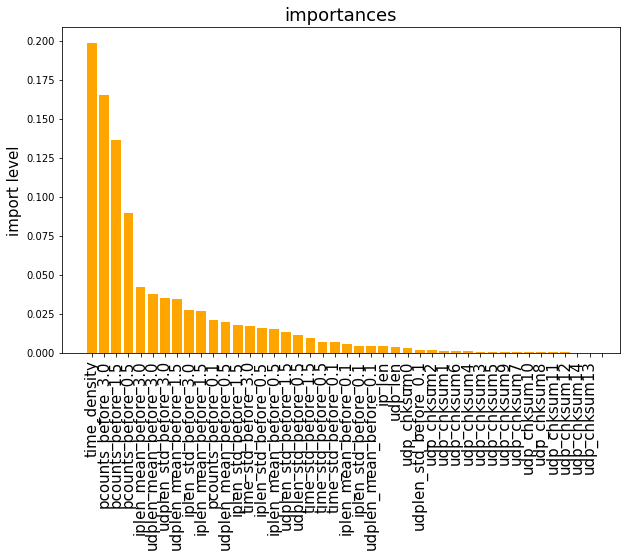

In [ ]:
threshold = 0.01
x_selected = x_train[:, importances > threshold]
plt.figure(figsize=(10, 6))
plt.title("importances", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
#plt.rcParams['axes.unicode_minus'] = False
for i in range(42):
    plt.bar(i, importances[indices0[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns0.shape[0]), x_columns0_indices, rotation=90, fontsize=15)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.991366799389722

In [ ]:
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[   11,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,  1062,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,  3358,     1,     0,     0,     0,    11,    10],
       [    0,     0,     0,  7500,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,   144,     8,     8,     0,     0],
       [    0,     0,     0,     0,     2,   148,     6,     0,     0],
       [    0,     0,     0,     0,     1,     3,   142,     0,     0],
       [    0,     0,     1,     6,     0,     0,     0, 13482,     2],
       [    0,     0,   163,     0,     0,     0,     0,    10,   794]])

---
> 

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc           
clf2 = rfc()
time_start=time.time()

clf2.fit(x_trainpro, y_trainpro)   

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 101.91224527359009 s


In [ ]:
clf2.score(x_testpro,y_testpro) 

0.9979905481338146

In [ ]:
importances2 = clf2.feature_importances_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("importances：", importances2)
x_columns = datapro.columns[1:]
indices = np.argsort(importances2)[::-1]
x_columns_indices = []
for f in range(x_trainpro.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances2[indices[f]]))
    x_columns_indices.append(x_columns[indices[f]])

importances： [0.07838083 0.06998107 0.00186895 0.21627689 0.01868065 0.06570353
 0.11015654 0.19481921 0.00224119 0.00341683 0.00095848 0.00284982
 0.00097123 0.00392971 0.01434259 0.01262261 0.01498679 0.01061526
 0.00895491 0.01998356 0.00905827 0.01696953 0.00971759 0.00520285
 0.03578856 0.01790681 0.03540082 0.0182149 ]
 1) time_density                   0.216277
 2) pcounts_before_3.0             0.194819
 3) pcounts_before_1.5             0.110157
 4) iplenpv                        0.078381
 5) udplenpv                       0.069981
 6) pcounts_before_0.5             0.065704
 7) iplen_mean_before_3.0          0.035789
 8) udplen_mean_before_3.0         0.035401
 9) iplen_mean_before_1.5          0.019984
10) pcounts_before_0.1             0.018681
11) udplen_std_before_3.0          0.018215
12) iplen_std_before_3.0           0.017907
13) udplen_mean_before_1.5         0.016970
14) udplen_mean_before_0.5         0.014987
15) iplen_mean_before_0.5          0.014343
16) iplen_std

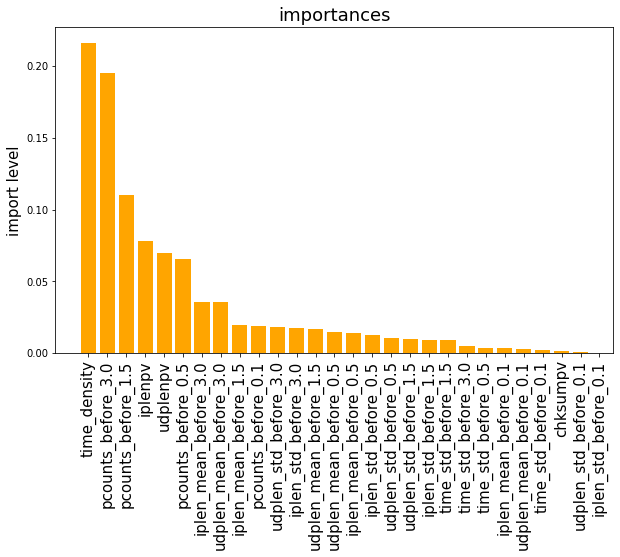

In [ ]:
threshold = 0.01
x_selected = x_trainpro[:, importances2 > threshold]
plt.figure(figsize=(10, 6))
plt.title("importances", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
#plt.rcParams['axes.unicode_minus'] = False
for i in range(27):
    plt.bar(i, importances2[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

---

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelb = GaussianNB()
time_start=time.time()
modelb.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.18202638626098633 s


In [ ]:
modelb2 = GaussianNB()
time_start=time.time()
modelb2.fit(x_train1pro, y_train1pro)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.1462383270263672 s


In [ ]:
y_pred1 = modelb.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_pred1)

0.8982994083280617

In [ ]:
confusion_matrix(y_test1, y_pred1)

array([[   14,     0,     0,     0,     0,     0,     0,     0,     0],
       [    3,  1070,     0,     0,     1,     0,     0,     0,     0],
       [    3,     0,  3191,   109,     0,     0,     2,    26,   100],
       [  840,     0,   344,  6175,     0,     0,     0,     0,    22],
       [    3,    10,     0,     0,    62,    12,    84,     0,     0],
       [    4,    20,     0,     0,     1,    76,    93,     0,     0],
       [   13,     6,     0,     0,     0,     4,    98,     0,     0],
       [    5,     0,     1,   110,     0,     1,     1, 13333,    53],
       [    2,     0,   754,    37,     0,     0,     0,    69,   121]])

In [ ]:
y_pred1pro = modelb2.predict(x_test1pro)

In [ ]:
accuracy_score(y_test1pro, y_pred1pro)

0.9081606073010084

---

In [ ]:
from sklearn.svm import SVC
model = SVC()
time_start=time.time()
model.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 1638.4351961612701 s


In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_pred1)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
time_start=time.time()
model.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 739.1256790161133 s


---
> Sequential Model_Softmax multi-classification based on multilayer perceptron

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
model.add(Dense(64, activation='relu', input_dim=42))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
y_train_h = keras.utils.to_categorical(y_train1, num_classes=9)
y_test_h = keras.utils.to_categorical(y_test1, num_classes=9)

In [ ]:
model.fit(x_train1, y_train_h,
          epochs=50,
          batch_size=35)

Epoch 1/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.3510 - accuracy: 0.8900
Epoch 2/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.2297 - accuracy: 0.9248
Epoch 3/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.2129 - accuracy: 0.9290
Epoch 4/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.2041 - accuracy: 0.9310
Epoch 5/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.1975 - accuracy: 0.9328
Epoch 6/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.1928 - accuracy: 0.9341
Epoch 7/50
6911/6911 [==============================] - 8s 1ms/step - loss: 0.1886 - accuracy: 0.9348
Epoch 8/50
6911/6911 [==============================] - 8s 1ms/step - loss: 0.1846 - accuracy: 0.9359
Epoch 9/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.1817 - accuracy: 0.9373
Epoch 10/50
6911/6911 [==============================] - 7s 1ms/step - loss: 0.179

In [ ]:
score = model.evaluate(x_test1, y_test_h, batch_size=35)

768/768 [==============================] - 1s 840us/step - loss: 0.1364 - accuracy: 0.9464


---
> Anomaly Detection

In [ ]:
anormaldata, normaldata = [x for _, x in data.groupby(data['source'] > 1)]

In [ ]:
anormaldata2, normaldata2 = [x for _, x in datapro.groupby(datapro['source'] > 1)]

*isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
features = x_columns[indices[0:43]]

In [ ]:
normaldata_det = normaldata[features]
anormaldata_det = anormaldata[features]
normaldata_det.describe()

NameError: ignored

In [ ]:
normaldata_train0, normaldata_test0 = train_test_split(normaldata, test_size = 0.2)
normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.2)
len(normaldata_test)

36567

In [ ]:
#cost somany time
#from sklearn import svm
#svmdet = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
#test0 = svmdet.fit(normaldata_train0)
#isanormal = test0.predict(anormaldata_det)
#isanormal

In [ ]:

test = IsolationForest(random_state=0).fit(normaldata_train)

In [ ]:
#isanormal = test.predict(anormaldata)
isanormal = test.predict(anormaldata_det)
isanormal

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
rate0 = np.sum(isanormal == -1)/len(isanormal)
print('The discrimination rate of abnormal data: %f'%rate0)

The discrimination rate of abnormal data: 1.000000


In [ ]:
isnormal = test.predict(normaldata_test)
isnormal

array([ 1,  1,  1, ...,  1, -1,  1])

In [ ]:
rate = np.sum(isnormal == -1)/len(isnormal)
print('The misjudgment rate of normal data： %f'%rate)

The misjudgment rate of normal data： 0.194000


In [ ]:
rate0 = []
rate = []
tim = []
for i in range(1,43,2):
   print('%d begins'%i)
   features = x_columns0[indices0[0:i]]
   normaldata_det = normaldata[features]
   anormaldata_det = anormaldata[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0).fit(normaldata_train)
   time_end=time.time()
   tim.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate0.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate.append(np.sum(isnormal == -1)/len(isnormal))

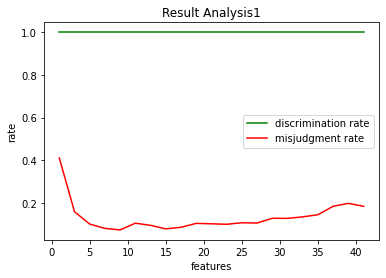

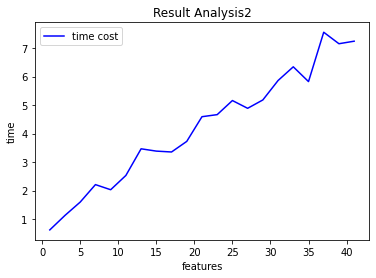

In [ ]:
plt.title('Result Analysis1')
plt.plot(range(1,43,2), rate0, color='green', label='discrimination rate')
plt.plot(range(1,43,2), rate, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,43,2), tim, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

In [ ]:
print('%d features is the best with misjudgement rate %f, with time %f'%(2*rate.index(min(rate))+1,min(rate),tim[rate.index(min(rate))]))

9 features is the best with misjudgement rate 0.073159, with time 2.027904


In [ ]:
rate02 = []
rate2 = []
tim2 = []
for i in range(1,20,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata2[features]
   anormaldata_det = anormaldata2[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0,contamination=0.1).fit(normaldata_train)
   time_end=time.time()
   tim2.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate02.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate2.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins


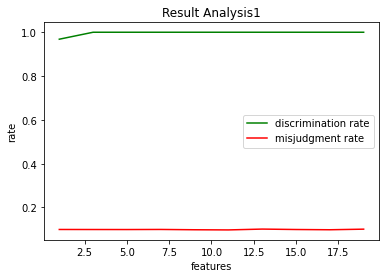

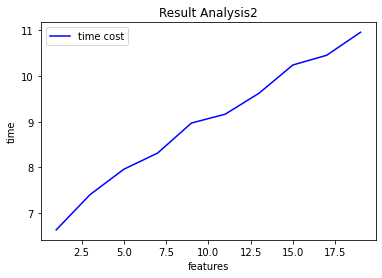

11 features is the best with misjudgement rate 0.097645, with time 9.164129


In [ ]:
plt.title('Result Analysis1')
plt.plot(range(1,20,2), rate02, color='green', label='discrimination rate')
plt.plot(range(1,20,2), rate2, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,20,2), tim2, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

print('%d features is the best with misjudgement rate %f, with time %f'%(2*rate2.index(min(rate2))+1,min(rate2),tim2[rate2.index(min(rate2))]))

In [ ]:
rate02 = []
rate2 = []
tim2 = []
for i in range(1,20,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata2[features]
   anormaldata_det = anormaldata2[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0,contamination=0.05).fit(normaldata_train)
   time_end=time.time()
   tim2.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate02.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate2.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins


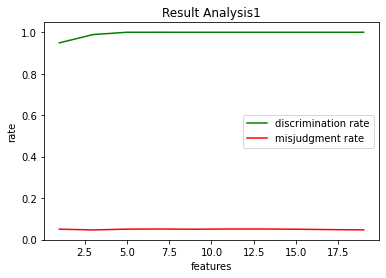

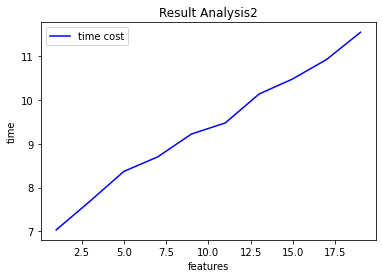

In [ ]:
plt.title('Result Analysis1')
plt.plot(range(1,20,2), rate02, color='green', label='discrimination rate')
plt.plot(range(1,20,2), rate2, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,20,2), tim2, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

In [ ]:
print('%d features is the best with discrimination rate %f, with misjudgement rate %f, with time %f'%(2*rate02.index(max(rate02))+1,max(rate02),rate2[rate02.index(max(rate02))],tim2[rate02.index(max(rate02))]))

7 features is the best with discrimination rate 1.000000, with misjudgement rate 0.050662, with time 8.700834


In [ ]:
rate02 = []
rate2 = []
tim2 = []
for i in range(1,20,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata2[features]
   anormaldata_det = anormaldata2[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0,contamination=0.03).fit(normaldata_train)
   time_end=time.time()
   tim2.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate02.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate2.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins


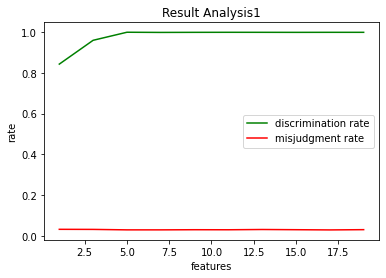

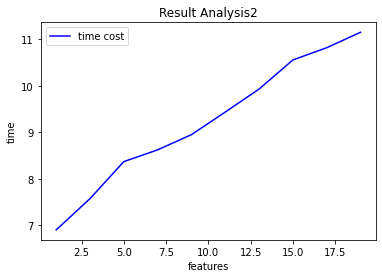

17 features is the best with misjudgement rate 0.028275, with time 10.815503


In [ ]:
plt.title('Result Analysis1')
plt.plot(range(1,20,2), rate02, color='green', label='discrimination rate')
plt.plot(range(1,20,2), rate2, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,20,2), tim2, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

print('%d features is the best with misjudgement rate %f, with time %f'%(2*rate2.index(min(rate2))+1,min(rate2),tim2[rate2.index(min(rate2))]))

In [ ]:
print('%d features is the best with discrimination rate %f, with misjudgement rate %f, with time %f'%(2*rate2.index(min(rate2))+1,rate02[rate2.index(min(rate2))],min(rate2),tim2[rate2.index(min(rate2))]))

17 features is the best with discrimination rate 0.999526, with misjudgement rate 0.028275, with time 10.815503


In [ ]:
print('%d features is the best with discrimination rate %f, with misjudgement rate %f, with time %f'%(2*rate02.index(max(rate02))+1,max(rate02),rate2[rate02.index(max(rate02))],tim2[rate02.index(max(rate02))]))

5 features is the best with discrimination rate 0.999905, with misjudgement rate 0.028546, with time 8.367690


In [ ]:
rate02 = []
rate2 = []
tim2 = []
for i in range(1,20,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata2[features]
   anormaldata_det = anormaldata2[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0,contamination=0.02).fit(normaldata_train)
   time_end=time.time()
   tim2.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate02.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate2.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins


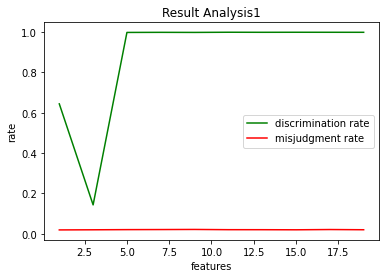

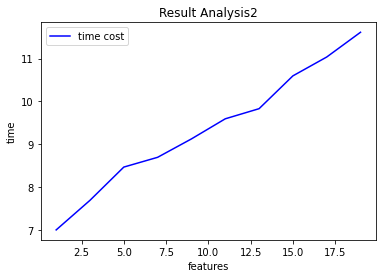

1 features is the best with misjudgement rate 0.019018, with time 6.999029


In [ ]:
plt.title('Result Analysis1')
plt.plot(range(1,20,2), rate02, color='green', label='discrimination rate')
plt.plot(range(1,20,2), rate2, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,20,2), tim2, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

print('%d features is the best with misjudgement rate %f, with time %f'%(2*rate2.index(min(rate2))+1,min(rate2),tim2[rate2.index(min(rate2))]))

In [ ]:
print('%d features is the best with discrimination rate %f, with misjudgement rate %f, with time %f'%(2*rate2.index(min(rate2))+1,rate02[rate2.index(min(rate2))],min(rate2),tim2[rate2.index(min(rate2))]))

1 features is the best with discrimination rate 0.644171, with misjudgement rate 0.019018, with time 6.999029


In [ ]:
print('%d features is the best with discrimination rate %f, with misjudgement rate %f, with time %f'%(2*rate02.index(max(rate02))+1,max(rate02),rate2[rate02.index(max(rate02))],tim2[rate02.index(max(rate02))]))

11 features is the best with discrimination rate 0.999431, with misjudgement rate 0.020180, with time 9.593995


In [ ]:
datapro

,source,iplenpv,udplenpv,chksumpv,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
0,4,0.467290,0.467290,0.071429,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
1,6,0.465969,0.465969,0.071429,0.035480,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
2,5,0.467290,0.467290,0.142857,0.109544,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
3,4,0.467290,0.467290,0.035714,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
4,4,0.439252,0.439252,0.107143,15.869329,2,2,2,2,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,1,0.000000,0.000000,0.142857,0.001486,3169,3191,3191,3191,0.008503,58.0,0.000000,38.0,0.000000,0.028721,58.0,0.000000,38.0,0.000000,0.028721,58.0,0.000000,38.0,0.000000,0.028721,58.0,0.000000,38.0,0.000000
10406,1,0.000000,0.000000,0.142857,0.001486,3170,3192,3192,3192,0.008506,58.0,0.000000,38.0,0.000000,0.028719,58.0,0.000000,38.0,0.000000,0.028719,58.0,0.000000,38.0,0.000000,0.028719,58.0,0.000000,38.0,0.000000
10407,1,0.000000,0.000000,0.142857,0.001485,3171,3193,3193,3193,0.008510,58.0,0.000000,38.0,0.000000,0.028716,58.0,0.000000,38.0,0.000000,0.028716,58.0,0.000000,38.0,0.000000,0.028716,58.0,0.000000,38.0,0.000000
10408,1,0.000000,0.000000,0.142857,0.001485,3172,3194,3194,3194,0.008513,58.0,0.000000,38.0,0.000000,0.028713,58.0,0.000000,38.0,0.000000,0.028713,58.0,0.000000,38.0,0.000000,0.028713,58.0,0.000000,38.0,0.000000


In [ ]:
abnormal = datapro[datapro['source'] == 1]

In [ ]:
ypred = tr2.predict(abnormal.values[:,1:29])
pd.value_counts(ypred)

1.0    10410
dtype: int64

---
> Hash

In [ ]:
datahash = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]

In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
def hash(s):
  shash = s[:3]
  return shash

In [ ]:
datahash = datahash.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('ip_chksum'))
datahash = datahash.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('udp_chksum'))
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,10,48,44,28,1000,0100,0111,0100,1010,0110,0100,0100
0,11,32,63,12,1000,0100,0111,0100,1010,0110,0100,0100


In [ ]:
for col in ['ip_chksum0',	'ip_chksum1',	'ip_chksum2',	'ip_chksum3',	'udp_chksum0',	'udp_chksum1',	'udp_chksum2',	'udp_chksum3']:
  datahash[col] = datahash[col].apply(hash)
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,10,48,44,28,100,010,011,010,101,011,010,010
0,11,32,63,12,100,010,011,010,101,011,010,010


In [ ]:
datahash.reset_index(drop=True)
datahash = datahash.astype(int)
datahash.describe()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
count,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459,16.664191,7.245658,96.336110,85.634553,55.790946,58.514906,50.257174,60.541986
std,1.048580,7.477088,13.105836,7.477088,23.265596,26.171932,23.525262,41.121476,50.234023,49.586884,50.424019,49.552130
min,1.000000,32.000000,36.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,100.000000,1.000000,10.000000,1.000000,10.000000
50%,13.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,101.000000,100.000000,100.000000,11.000000,100.000000
75%,13.000000,40.000000,63.000000,20.000000,11.000000,0.000000,101.000000,110.000000,101.000000,101.000000,101.000000,101.000000
max,14.000000,748.000000,114.000000,728.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000


In [ ]:
1/22

0.045454545454545456

In [ ]:
   features = x_columns[indices[3:20]]
   normaldata_det = normaldata[features]
   anormaldata_det = anormaldata[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0).fit(normaldata_train)
   time_end=time.time()
   tim.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate0.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   

In [ ]:
np.sum(isnormal == -1)

3636

In [ ]:
len(isnormal)

27031

In [ ]:
np.sum(isnormal == -1)/len(isnormal)

0.1345122267026747

In [ ]:
rate

[0.16407088158040767,
 0.1588916429284895,
 0.16636454441197143,
 0.17132181569309313,
 0.15367540971477192,
 0.17161777218748844,
 0.1598535015352743,
 0.1400244164107876]

In [ ]:
rate

[0.3012097221708409,
 0.2929969294513706,
 0.19270467241315525,
 0.17764788576079316,
 0.17335651659206097,
 0.15082682845621695,
 0.13946949798379638,
 0.1461655136694906,
 0.15056786652362103,
 0.14272501942214494,
 0.16203618068143982,
 0.1402463837815841,
 0.15282453479338537,
 0.16466279456919833,
 0.17405941326624985,
 0.19355554733454183,
 0.2049868669305612,
 0.19096592800858272,
 0.252783840775406,
 0.24889941178646738,
 0.317339351115386]

In [ ]:
sum([34445,74841,1601,1604,1366,134586,9736])

258179